In [3]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# for the persistence diagrams and the betti numbers
import scipy as sp
from matplotlib import cm
import ripser
import persim

# for the persistence landscape
from persim import PersLandscapeApprox, plot_diagrams
from persim.landscapes import plot_landscape_simple

# for running the code faster
import multiprocessing as mp

# to remove the warnings
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import multiprocessing

cpu_count = os.cpu_count()
cpu_count_mp = multiprocessing.cpu_count()

print(f"Number of CPUs (logical cores): {cpu_count}")
print(f"Number of CPUs (multiprocessing): {cpu_count_mp}")

Number of CPUs (logical cores): 32
Number of CPUs (multiprocessing): 32


# Persistent Homology
1. Turn distance matrices into a Rips filtration
2. Look at the Betti numbers for the formations of holes and voids near/during a crash
3. Try characterizing the change in shape with persistence landscapes.

This code is for accessing the data.

In [3]:
# filepath = 'matrices/110 2023-09-25 00:00:00.pickl'
# with open(filepath, 'rb') as f:
#     file = pickle.load(f)
# file

This code is for getting the matrices and the betti numbers.

In [4]:
# directory = r"matrices"
# betti_df = pd.DataFrame(columns=["file name", "\u03B20", "\u03B21", "\u03B22"])
# plot_directory = r"trial_pers_hom"

# for name in sorted(os.listdir(directory)):
#     file_path = os.path.join(directory, name)
    
#     if os.path.isfile(file_path) and name.endswith('.pickl'):
#         try:
#             with open(file_path, 'rb') as f:
#                 print(f"Distance matrix of {name}")
#                 data = pickle.load(f)
#                 dist_matrix = data.get('distance matrix')
#                 if dist_matrix is None:
#                     print(f"Distance matrix not found in {name}")
#         except (pickle.UnpicklingError, EOFError, KeyError) as e:
#             print(f"Error loading {name}: {e}")
#             continue
    
#     # this is for making a persistence diagram from a rips filtration 
#     pers_diag = ripser.ripser(dist_matrix, distance_matrix=True, maxdim=2)
#     diagrams = pers_diag['dgms']
    
#     fig, ax = plt.subplots()
#     persim.plot_diagrams(diagrams, ax=ax)
#     plt.title(f'Persistence Diagram for {name}')
#     plt.show()
    
#     # # This is to save the persistence diagram
#     # diagram_path = os.path.join(plot_directory, f"{name}_persistence_diagram.png")
#     # plt.savefig(diagram_path, dpi=300, bbox_inches='tight')
#     # plt.close(fig) 
    
#     # this is to get the betti numbers
#     # Note: will edit this to have more betti numbers later
#     betti_0 = sum(d[1] == np.inf for d in diagrams[0]) if len(diagrams) > 0 else 0
#     betti_1 = len(diagrams[1]) if len(diagrams) > 1 else 0 
#     betti_2 = len(diagrams[2]) if len(diagrams) > 2 else 0 
    
#     new_row = pd.DataFrame({"file name": [name], 
#                             "\u03B20": [betti_0], 
#                             "\u03B21": [betti_1], 
#                             "\u03B22": [betti_2]
#                            }, index=[name])
    
#     betti_df = pd.concat([betti_df, new_row], ignore_index=True)
    
#     # this is to get the persistence landscape
#     for dim in range(2):
#         filtered_diagrams = [d for d in diagrams if len(d) > 0]

#         min_birth, max_death = (
#             min((p[0] for d in diagrams if len(d) > 0 for p in d), default=float("inf")),
#             max((p[1] for d in diagrams if len(d) > 0 for p in d if p[1] != np.inf), default=float("-inf"))
#         )

#         if dim >= len(diagrams) or len(diagrams[dim]) == 0:
#             print(f"Skipping persistence landscape for H{dim} (empty diagram)")
#             continue 
        
#         pla = PersLandscapeApprox(dgms=diagrams, hom_deg=dim, start=min_birth, stop=max_death)
        
#         fig, ax = plt.subplots()
#         ax = plot_landscape_simple(pla, depth_range=range(10))
#         plt.xlabel('time')
#         plt.ylabel('feature prominence')
#         plt.title(f'Persistence Landscape for H{dim}')
#         plt.legend().set_visible(False)
#         plt.show()

#         # # This is to save the persistence landscape
#         # landscape_path = os.path.join(plot_directory, f"{name}_H{dim}_landscape.png")
#         # plt.savefig(landscape_path, dpi=300, bbox_inches='tight')
#         # plt.close(fig)

# betti_df.to_pickle("betti_df.pkl") 

# Betti numbers
Here, I tried to get only the Betti numbers in the years 2013 and 2015. 

This code is for getting the betti numbers only.

In [ ]:
directory = r"matrices"
betti_df = pd.DataFrame(columns=["file name", "\u03B20", "\u03B21", "\u03B22"])

for name in sorted(os.listdir(directory)):
    file_path = os.path.join(directory, name)
    
    if os.path.isfile(file_path) and name.endswith('.pickl'):
        try:
            with open(file_path, 'rb') as f:
                print(f"Distance matrix of {name}")
                data = pickle.load(f)
                dist_matrix = data.get('distance matrix')
                if dist_matrix is None:
                    print(f"Distance matrix not found in {name}")
        except (pickle.UnpicklingError, EOFError, KeyError) as e:
            print(f"Error loading {name}: {e}")
            continue
    
    # this is for making a persistence diagram from a rips filtration 
    pers_diag = ripser.ripser(dist_matrix, distance_matrix=True, maxdim=2)
    diagrams = pers_diag['dgms']
    
    # this is to get the betti numbers
    # Note: will edit this to have more betti numbers later
    betti_0 = sum(d[1] == np.inf for d in diagrams[0]) if len(diagrams) > 0 else 0
    betti_1 = len(diagrams[1]) if len(diagrams) > 1 else 0 
    betti_2 = len(diagrams[2]) if len(diagrams) > 2 else 0 
    
    new_row = pd.DataFrame({"file name": [name], 
                            "\u03B20": [betti_0], 
                            "\u03B21": [betti_1], 
                            "\u03B22": [betti_2]
                           }, index=[name])
    
    betti_df = pd.concat([betti_df, new_row], ignore_index=True)

betti_df.to_pickle("new_betti_df.pkl") 

Distance matrix of 110 2013-09-26 00:00:00.pickl
Distance matrix of 110 2013-09-27 00:00:00.pickl
Distance matrix of 110 2013-09-30 00:00:00.pickl
Distance matrix of 110 2013-10-01 00:00:00.pickl
Distance matrix of 110 2013-10-02 00:00:00.pickl
Distance matrix of 110 2013-10-03 00:00:00.pickl
Distance matrix of 110 2013-10-04 00:00:00.pickl
Distance matrix of 110 2013-10-07 00:00:00.pickl
Distance matrix of 110 2013-10-08 00:00:00.pickl
Distance matrix of 110 2013-10-09 00:00:00.pickl
Distance matrix of 110 2013-10-10 00:00:00.pickl
Distance matrix of 110 2013-10-11 00:00:00.pickl
Distance matrix of 110 2013-10-14 00:00:00.pickl
Distance matrix of 110 2013-10-15 00:00:00.pickl
Distance matrix of 110 2013-10-16 00:00:00.pickl
Distance matrix of 110 2013-10-17 00:00:00.pickl
Distance matrix of 110 2013-10-18 00:00:00.pickl
Distance matrix of 110 2013-10-21 00:00:00.pickl
Distance matrix of 110 2013-10-22 00:00:00.pickl
Distance matrix of 110 2013-10-23 00:00:00.pickl
Distance matrix of 1

In [6]:
filepath = r'betti_df.pkl'
with open(filepath, 'rb') as f:
    betti_df = pickle.load(f)
betti_df

,file name,β0,β1,β2
0,110 2013-09-26 00:00:00.pickl,1,339,841
1,110 2013-09-27 00:00:00.pickl,1,344,851
2,110 2013-09-30 00:00:00.pickl,1,340,860
3,110 2013-10-01 00:00:00.pickl,1,323,872
4,110 2013-10-02 00:00:00.pickl,1,312,886
...,...,...,...,...
2604,110 2023-09-20 00:00:00.pickl,1,45,39
2605,110 2023-09-21 00:00:00.pickl,1,21,18
2606,110 2023-09-22 00:00:00.pickl,1,4,2
2607,110 2023-09-25 00:00:00.pickl,1,2,0


In [38]:
betti_df.iloc[1634:1896] # 2020
betti_df.iloc[1896:2157] # 2021

,file name,β0,β1,β2
1896,110 2021-01-01 00:00:00.pickl,1,384,1080
1897,110 2021-01-04 00:00:00.pickl,1,380,1098
1898,110 2021-01-05 00:00:00.pickl,1,412,1196
1899,110 2021-01-06 00:00:00.pickl,1,403,1277
1900,110 2021-01-07 00:00:00.pickl,1,412,1290
...,...,...,...,...
2152,110 2021-12-27 00:00:00.pickl,1,283,836
2153,110 2021-12-28 00:00:00.pickl,1,290,855
2154,110 2021-12-29 00:00:00.pickl,1,292,858
2155,110 2021-12-30 00:00:00.pickl,1,296,849


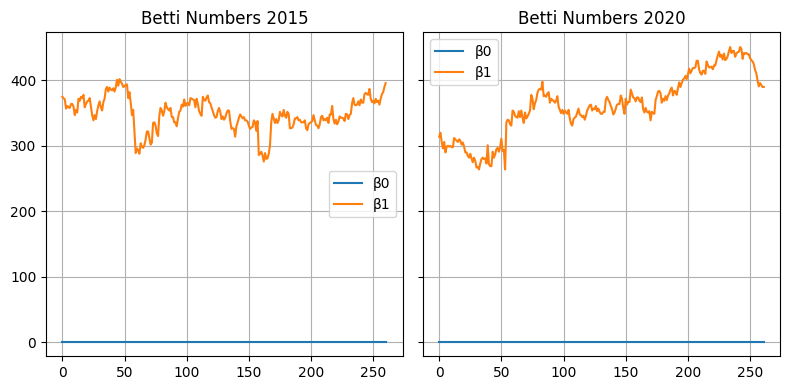

In [12]:
import matplotlib.pyplot as plt

# Extract first-year data
first_year = betti_df.iloc[330:591]
betti0_2015 = first_year.iloc[:, 1].values
betti1_2015 = first_year.iloc[:, 2].values
betti2_2015 = first_year.iloc[:, 3].values

# Extract second-year data
second_year = betti_df.iloc[1634:1896]
betti0_2020 = second_year.iloc[:, 1].values
betti1_2020 = second_year.iloc[:, 2].values
betti2_2020 = second_year.iloc[:, 3].values

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True)

aa = ["\u03B20", "\u03B21", "\u03B22"]

ax[0].plot(betti0_2015, label='\u03B20')
ax[0].plot(betti1_2015, label='\u03B21')
# ax[0].plot(betti2_2015, label='\u03B22')
ax[0].set_title('Betti Numbers 2015')
ax[0].grid()
ax[0].legend()

ax[1].plot(betti0_2020, label='\u03B20')
ax[1].plot(betti1_2020, label='\u03B21')
# ax[1].plot(betti2_2020, label='\u03B22')
ax[1].set_title('Betti Numbers 2020')
ax[1].grid()
ax[1].legend()

plt.tight_layout()
plt.show()

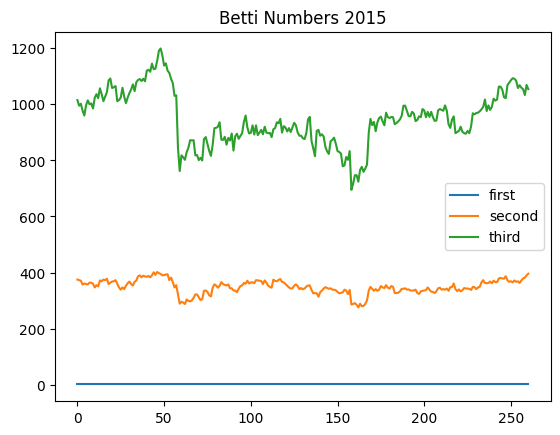

In [8]:
first_year = betti_df.iloc[330:591]

betti0 = first_year.iloc[:, 1].values
betti1 = first_year.iloc[:, 2].values
betti2 = first_year.iloc[:, 3].values

plt.plot(betti0, label='first')
plt.plot(betti1, label='second')
plt.plot(betti2, label='third')
plt.title('Betti Numbers 2015')
plt.legend()
plt.show()

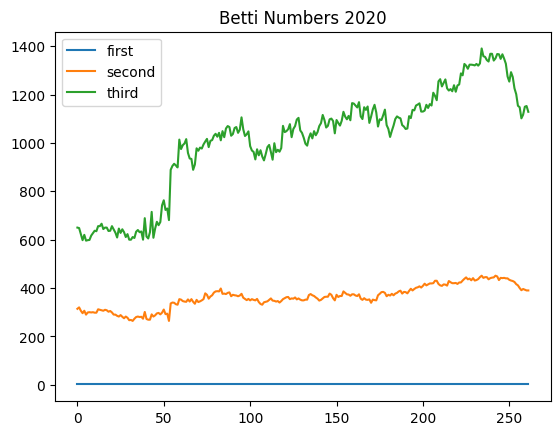

In [9]:
second_year = betti_df.iloc[1634:1896]

betti0 = second_year.iloc[:, 1].values
betti1 = second_year.iloc[:, 2].values
betti2 = second_year.iloc[:, 3].values

plt.plot(betti0, label='first')
plt.plot(betti1, label='second')
plt.plot(betti2, label='third')
plt.title('Betti Numbers 2020')
plt.legend()
plt.show()

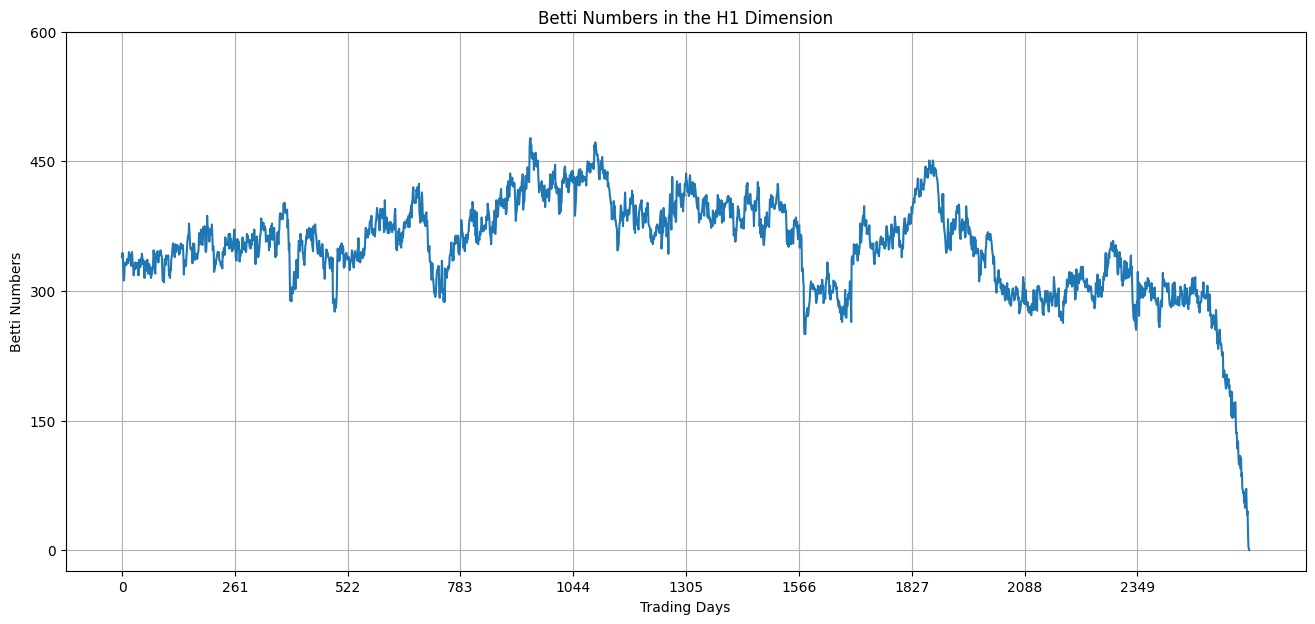

In [34]:
plt.figure(figsize=(16, 7))
# plt.plot(betti_df.iloc[:, 1])
plt.plot(betti_df.iloc[:, 2])
# plt.plot(betti_df.iloc[:, 3])
plt.yticks(range(0, 601, 150))
plt.xticks(range(0, 2610, 261))
plt.grid()
plt.title('Betti Numbers in the H1 Dimension')
plt.ylabel('Betti Numbers')
plt.xlabel('Trading Days')
plt.show()